<a href="https://colab.research.google.com/github/somewherelostt/Sentiment-Imbalance-Research/blob/main/SA_Imbalance_Cancer_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Accuracy: 0.9500

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       190
           1       0.00      0.00      0.00        10

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


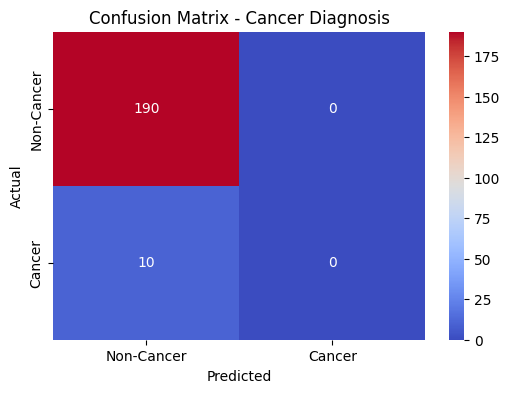

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ **Create an Imbalanced Dataset (Cancer Example)**
np.random.seed(42)

# Generate 1000 samples: 950 non-cancer (0), 50 cancer (1)
data_size = 1000
cancer_cases = int(0.05 * data_size)  # 5% cancer
non_cancer_cases = data_size - cancer_cases  # 95% non-cancer

# Generate random features (not actual medical data)
X = np.random.rand(data_size, 5)  # 5 features per sample
y = np.array([0] * non_cancer_cases + [1] * cancer_cases)  # 0 = non-cancer, 1 = cancer

# Shuffle the dataset
indices = np.arange(data_size)
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ **Train a Simple Logistic Regression Model**
model = LogisticRegression()
model.fit(X_train, y_train)

# 3️⃣ **Make Predictions**
y_pred = model.predict(X_test)

# 4️⃣ **Evaluate Model Performance**
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.4f}\n")

# Detailed classification report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5️⃣ **Confusion Matrix for Visualization**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Cancer", "Cancer"], yticklabels=["Non-Cancer", "Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cancer Diagnosis")
plt.show()
